In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [1]:
import kagglehub

path = kagglehub.dataset_download("adityakadiwal/water-potability")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/water-potability


In [2]:
import pandas as pd

dataset_path = path + '/water_potability.csv'
data1 = pd.read_csv(dataset_path)


**Columns: pH: The pH level of the water.Hardness: Water hardness, a measure of mineral content.Solids: Total dissolved solids in the water.Chloramines: Chloramines concentration in the water.Sulfate: Sulfate concentration in the water.Conductivity: Electrical conductivity of the water.Organic_carbon: Organic carbon content in the water.Trihalomethanes: Trihalomethanes concentration in the water.Turbidity: Turbidity level, a measure of water clarity.Potability: Target variable; indicates water potability with values 1 (potable) and 0 (not potable).**


**Exploring data**

In [18]:
data1.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [19]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [20]:
data1.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [21]:
data1.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [22]:
print(data1.duplicated().sum())

0


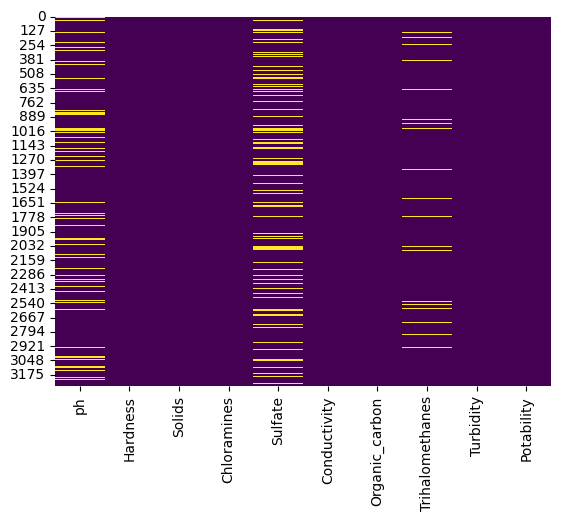

In [6]:
sns.heatmap(data1.isnull(), cbar=False, cmap='viridis')
plt.show()

In [ ]:
data1.shape

**Visualization**

In [7]:
numeric_cols = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
                'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

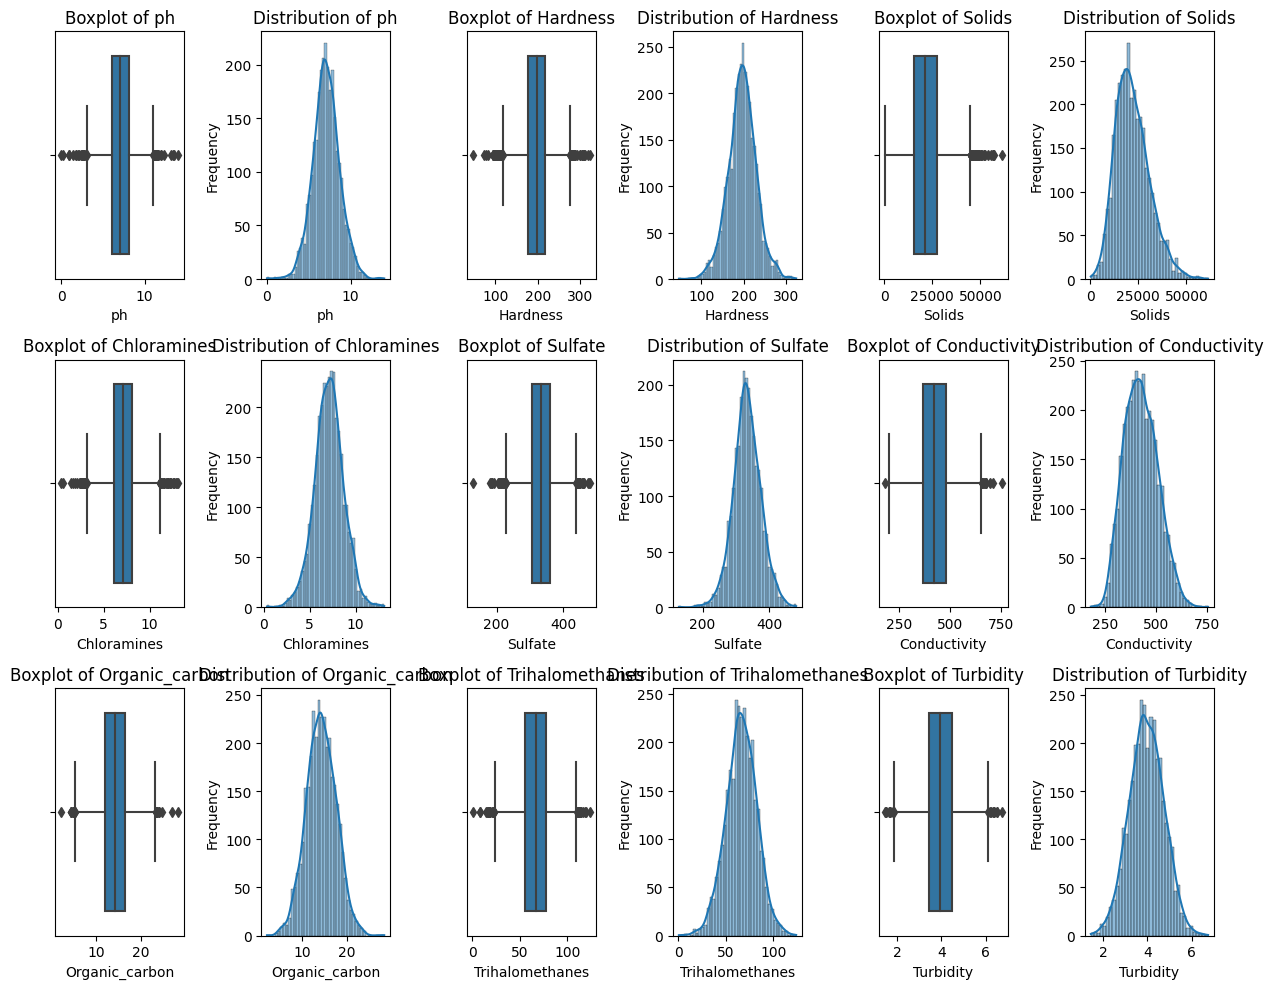

In [8]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 6, 2*i-1)  # Boxplot
    sns.boxplot(x=data1[col])
    plt.title(f'Boxplot of {col}')

    plt.subplot(3, 6, 2*i)  # Histogramme + KDE
    sns.histplot(data1[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

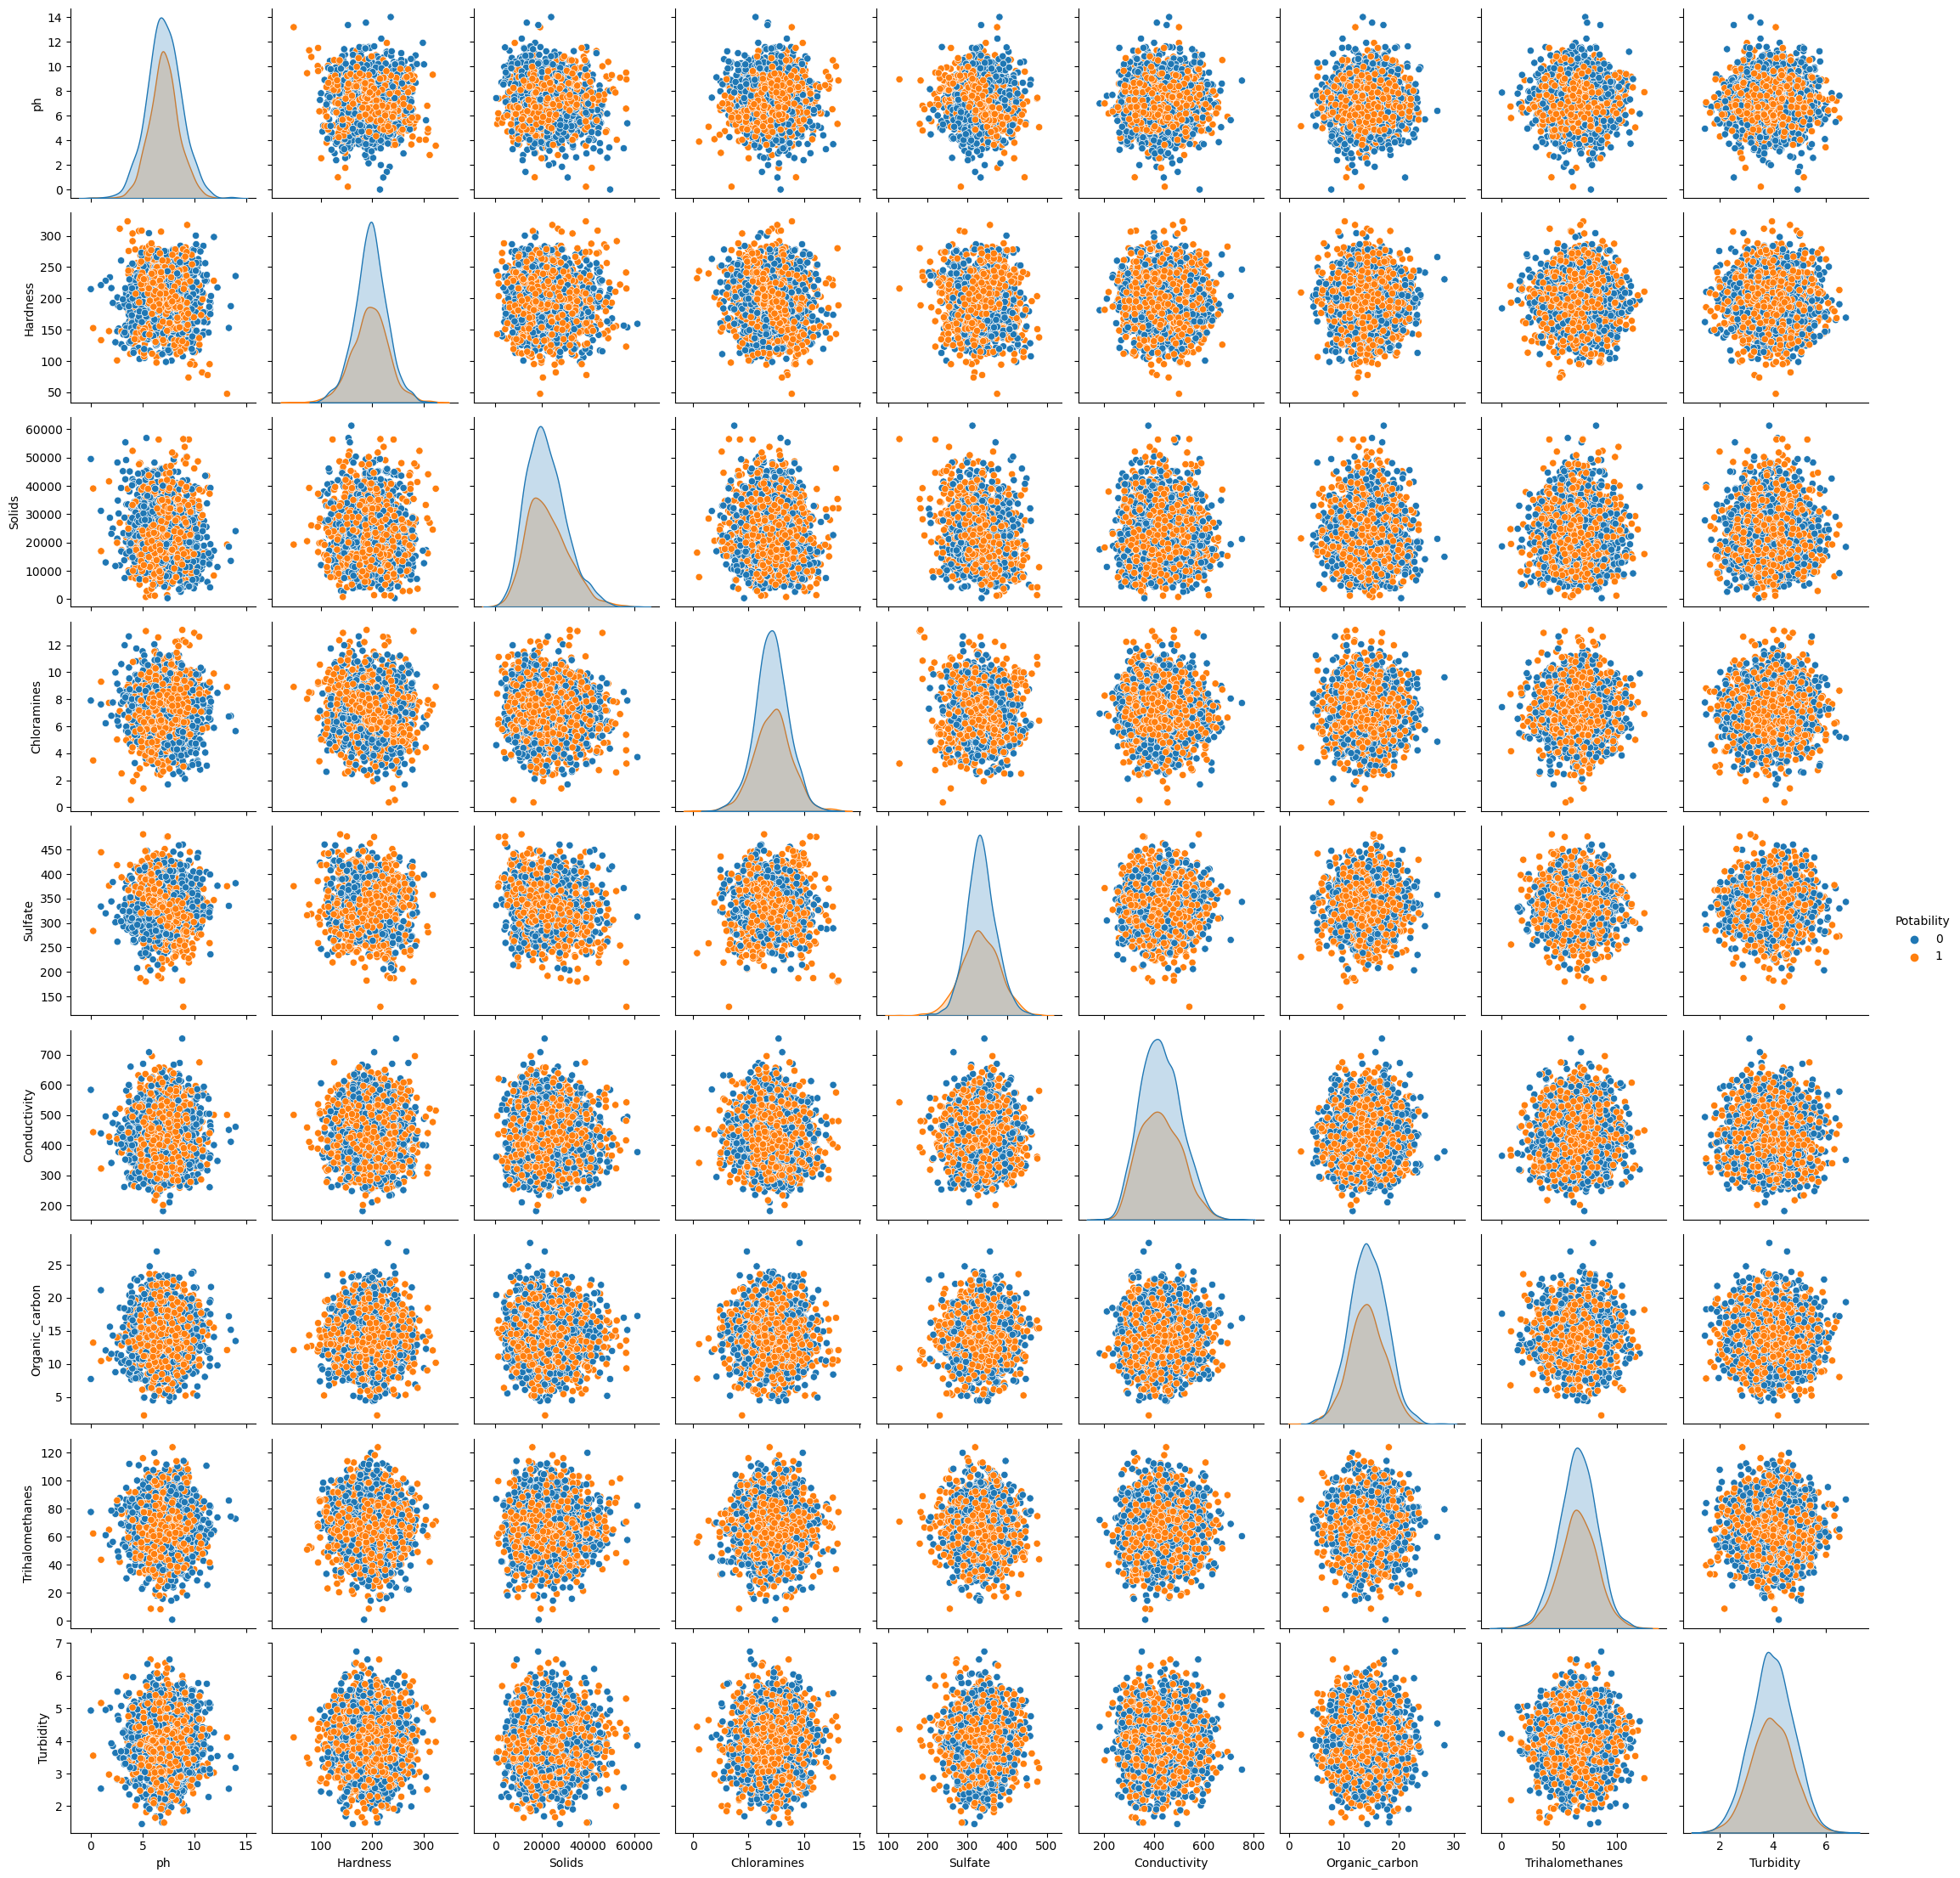

In [9]:
sns.pairplot(data1, hue='Potability')
plt.show()

In [3]:
data1['ph'] = data1['ph'].fillna(data1['ph'].mean())
data1['Sulfate'] = data1['Sulfate'].fillna(data1['Sulfate'].mean())
data1['Trihalomethanes'] = data1['Trihalomethanes'].fillna(data1['Trihalomethanes'].mean())

**Correlation**

In [11]:
corr_matrix = data1.corr()
print(corr_matrix)

                       ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.075833 -0.081884    -0.031811  0.014403   
Hardness         0.075833  1.000000 -0.046899    -0.030054 -0.092766   
Solids          -0.081884 -0.046899  1.000000    -0.070148 -0.149840   
Chloramines     -0.031811 -0.030054 -0.070148     1.000000  0.023791   
Sulfate          0.014403 -0.092766 -0.149840     0.023791  1.000000   
Conductivity     0.017192 -0.023915  0.013831    -0.020486 -0.014059   
Organic_carbon   0.040061  0.003610  0.010242    -0.012653  0.026909   
Trihalomethanes  0.002994 -0.012690 -0.008875     0.016627 -0.025605   
Turbidity       -0.036222 -0.014449  0.019546     0.002363 -0.009790   
Potability      -0.003287 -0.013837  0.033743     0.023779 -0.020619   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.017192        0.040061         0.002994  -0.036222   
Hardness            -0.023915        0.003610        

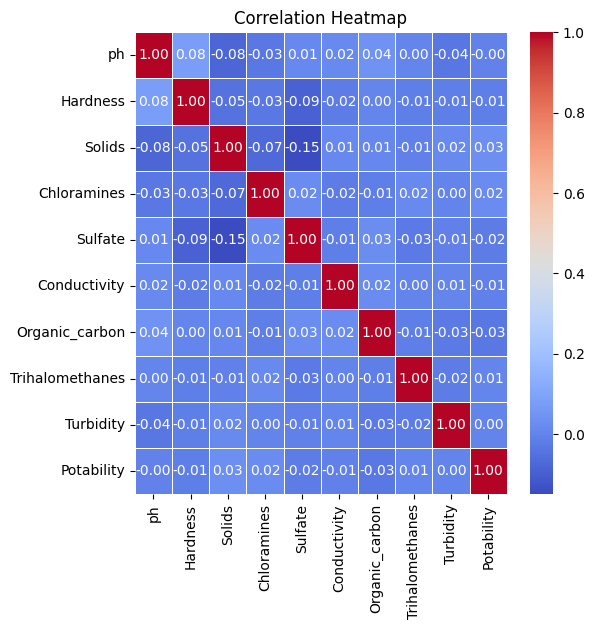

In [12]:
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Statistical Measures of Skewness**

In [13]:
from scipy.stats import skew
skew = data1.apply(lambda x: skew(x))
print(skew)

ph                 0.027783
Hardness          -0.039324
Solids             0.621350
Chloramines       -0.012093
Sulfate           -0.041166
Conductivity       0.264369
Organic_carbon     0.025521
Trihalomethanes   -0.085122
Turbidity         -0.007813
Potability         0.450577
dtype: float64


**Cheking Rang and Standard Deviation**

In [14]:
data1.columns = data1.columns.str.strip()
data = data1[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon',
                          'Trihalomethanes', 'Turbidity', 'Potability', ]]
range_values = data.max() - data.min()
std_values = data.std()

print("Range of each feature:")
print(range_values)

print("\nStandard Deviation of each feature:")
print(std_values)

Range of each feature:
ph                    14.000000
Hardness             275.692000
Solids             60906.253396
Chloramines           12.775000
Sulfate              352.030642
Conductivity         571.858866
Organic_carbon        26.100000
Trihalomethanes      123.262000
Turbidity              5.289000
Potability             1.000000
dtype: float64

Standard Deviation of each feature:
ph                    1.469956
Hardness             32.879761
Solids             8768.570828
Chloramines           1.583085
Sulfate              36.142612
Conductivity         80.824064
Organic_carbon        3.308162
Trihalomethanes      15.769881
Turbidity             0.780382
Potability            0.487849
dtype: float64


**Cheking balance**

In [15]:
print(data1['Potability'].value_counts())

Potability
0    1998
1    1278
Name: count, dtype: int64


**Charts**

* **Potability**. 

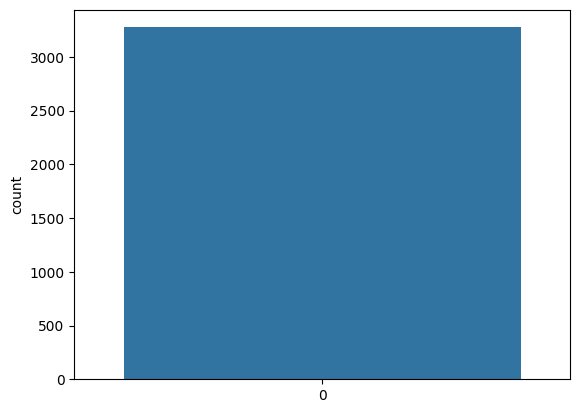

In [16]:
sns.countplot(data1['Potability'])
plt.show()

* **Pie Chart for Water Potability Distribution**. 

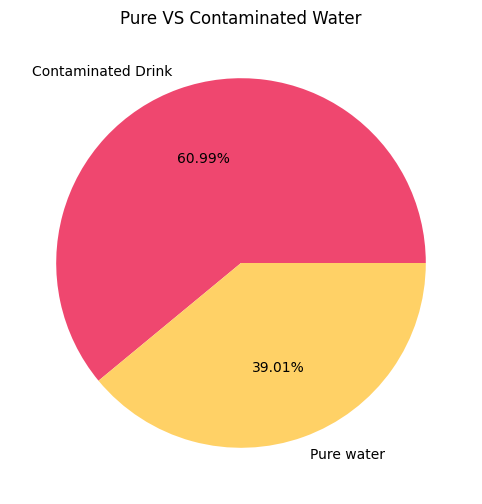

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.title('Pure VS Contaminated Water')
plt.pie(data1['Potability'].value_counts(), autopct='%0.2f%%', 
        labels=['Contaminated Drink', 'Pure water'], colors=['#ef476f', '#ffd166'])
plt.show()

* **Histogram for pH Levels**. 

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


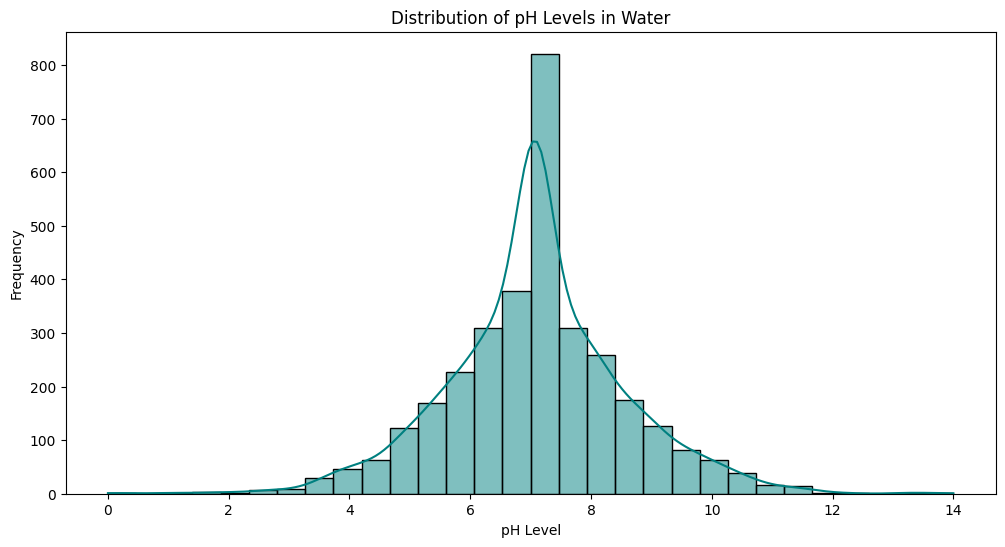

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(data1['ph'], bins=30, kde=True, color='teal')
plt.title('Distribution of pH Levels in Water')
plt.xlabel('pH Level')
plt.ylabel('Frequency')
plt.show()

* **Bar Chart for Mean Feature Values by Potability**. 

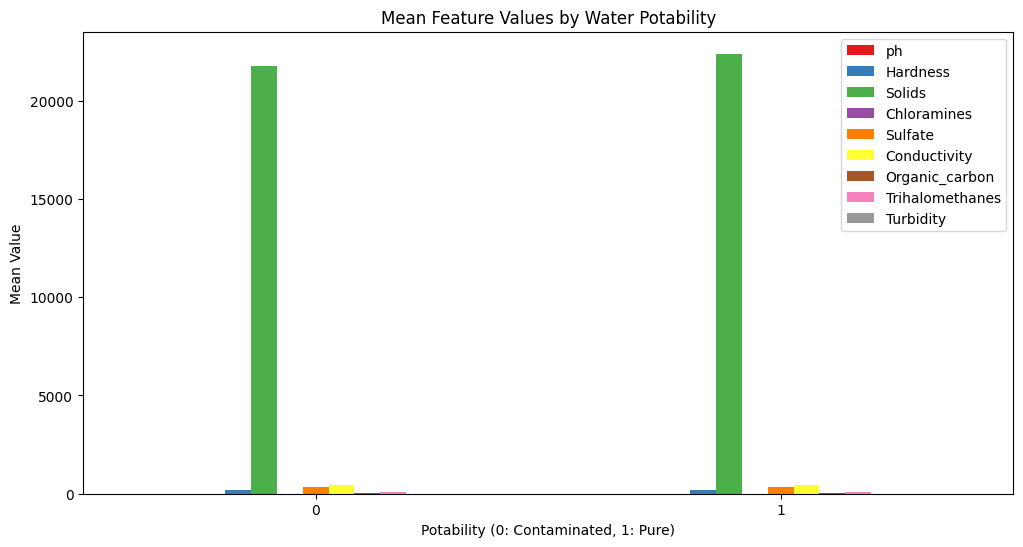

In [19]:
mean_values = data1.groupby('Potability').mean()

mean_values.plot(kind='bar', figsize=(12, 6), colormap='Set1')
plt.title('Mean Feature Values by Water Potability')
plt.ylabel('Mean Value')
plt.xlabel('Potability (0: Contaminated, 1: Pure)')
plt.xticks(rotation=0)
plt.show()


* **Violin Plot for Chloramines vs Potability**. 

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Potability', y='Chloramines', data=data1, palette='Set2')
plt.title('Chloramines Concentration vs Potability')
plt.xlabel('Potability (0: Contaminated, 1: Pure)')
plt.ylabel('Chloramines Concentration')
plt.show()


* **Turbidity Distribution**. 

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data1['Turbidity'], kde=True, color='orange', bins=30)
plt.title('Distribution of Turbidity Levels in Water')
plt.xlabel('Turbidity Level')
plt.ylabel('Frequency')
plt.show()


In [22]:
data1.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
data1['pH_bins'] = pd.cut(data1['ph'], bins=5)
data1['Hardness_bins'] = pd.cut(data1['Hardness'], bins=5)

features = ['pH_bins', 'Hardness_bins', 'Conductivity', 'Sulfate', 'Turbidity']
feature_counts = data1[features + ['Potability']].groupby(['Potability'] + features).size().unstack(fill_value=0)

feature_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Stacked Bar Chart: Feature Distribution by Potability')
plt.ylabel('Count')
plt.xlabel('Potability (0: Contaminated, 1: Pure)')
plt.legend(title='Feature Categories')
plt.show()


* **FacetGrid: Water Feature Distribution Across Potability**. 

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


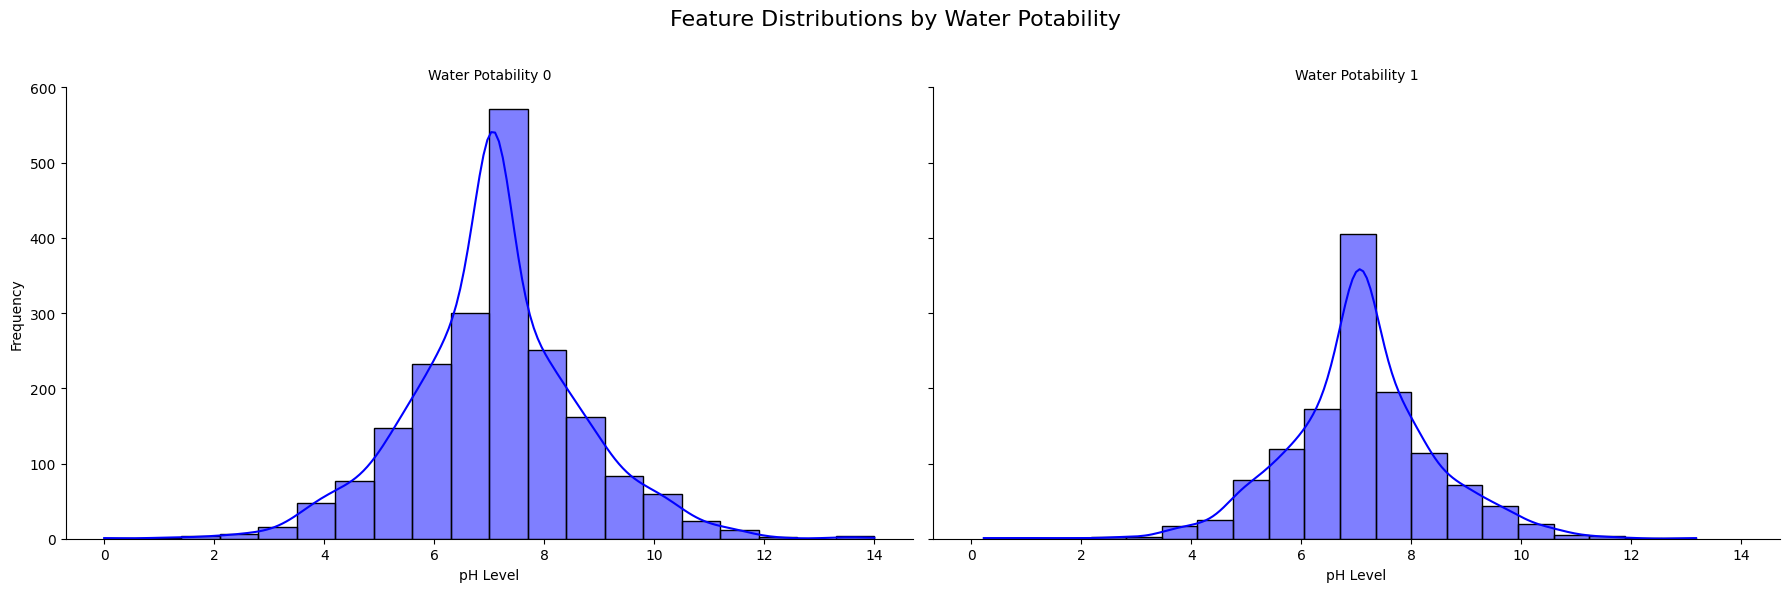

In [23]:
g = sns.FacetGrid(data1, col="Potability", height=6, aspect=1.5)
g.map(sns.histplot, 'ph', bins=20, kde=True, color='blue')
g.set_axis_labels('pH Level', 'Frequency')
g.set_titles("Water Potability {col_name}")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Feature Distributions by Water Potability', fontsize=16)
plt.show()


* **Pairwise Contour Plot: Features vs Potability**. 

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1138: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


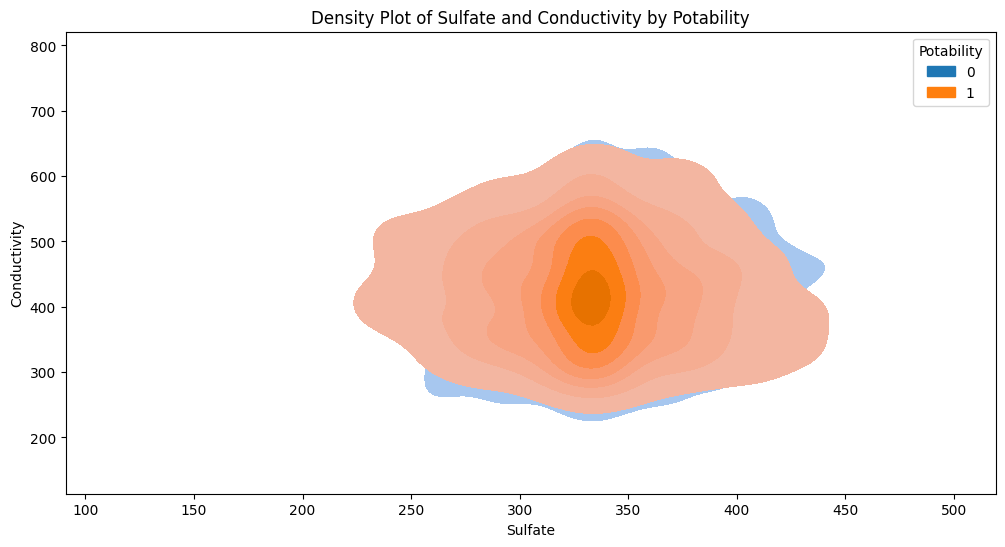

In [24]:
plt.figure(figsize=(12, 6))
sns.kdeplot(x='Sulfate', y='Conductivity', data=data1, hue='Potability', fill=True, cmap='coolwarm')
plt.title('Density Plot of Sulfate and Conductivity by Potability')
plt.xlabel('Sulfate')
plt.ylabel('Conductivity')
plt.show()

* **3D Scatter Plot for Feature Comparison**. 

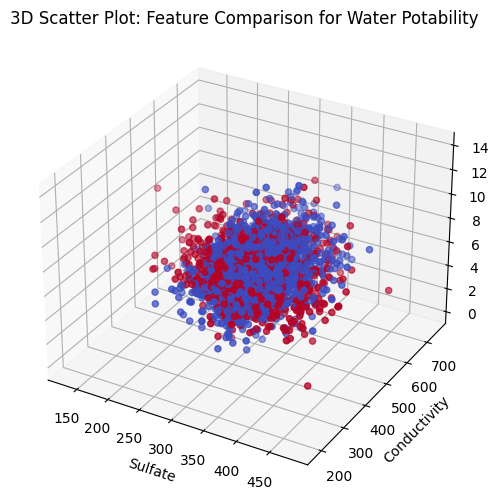

In [29]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data1['Sulfate'], data1['Conductivity'], data1['ph'], c=data1['Potability'], cmap='coolwarm', marker='o')
ax.set_xlabel('Sulfate')
ax.set_ylabel('Conductivity')
ax.set_zlabel('ph')
ax.set_title('3D Scatter Plot: Feature Comparison for Water Potability')
plt.show()

**Checking outliers**

In [ ]:
def outlier_percentage(df):
    for i in range(len(df.columns)):

        q1 = df[df.columns[i]].quantile(0.25)
        q3 = df[df.columns[i]].quantile(0.75)
        iqr = q3-q1

        upper = q3 + (iqr*1.5)
        lower = q1 - (iqr*1.5)

        percentage = (((len(df[df[df.columns[i]] > upper])) +
                      (len(df[df[df.columns[i]] < lower])))/len(df[df.columns[i]]))*100

        print(str(df.columns[i]) + ' : ' + str(percentage) + ' %')

In [ ]:
outlier_percentage(data1)

**Deleting outliers**

In [4]:
# KMeansClustering - delete outlier
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state=42)
kmeans.fit(data1)
labels = kmeans.labels_
data1 = data1[labels == labels.max()]
data1.reset_index(inplace = True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034 entries, 0 to 2033
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            2034 non-null   int64  
 1   ph               2034 non-null   float64
 2   Hardness         2034 non-null   float64
 3   Solids           2034 non-null   float64
 4   Chloramines      2034 non-null   float64
 5   Sulfate          2034 non-null   float64
 6   Conductivity     2034 non-null   float64
 7   Organic_carbon   2034 non-null   float64
 8   Trihalomethanes  2034 non-null   float64
 9   Turbidity        2034 non-null   float64
 10  Potability       2034 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 174.9 KB


In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(4, 4))
    sns.boxplot(data=data1[col], orient='h', color='#FF5B00')
    plt.title(f"After Outlier Removal - {col}")
    plt.show()


In [ ]:
print("Final dataset shape:", data1.shape)

In [28]:
outlier_percentage(data1)

index : 0.0 %
ph : 4.3264503441494595 %
Hardness : 1.8682399213372665 %
Solids : 0.4424778761061947 %
Chloramines : 2.0648967551622417 %
Sulfate : 7.27630285152409 %
Conductivity : 0.4424778761061947 %
Organic_carbon : 0.9341199606686332 %
Trihalomethanes : 1.6224188790560472 %
Turbidity : 0.5899705014749262 %
Potability : 0.0 %


**Cheking balance after deleting outliers**

In [31]:
print(data1['Potability'].value_counts())

Potability
0    1257
1     777
Name: count, dtype: int64


**Splitting data**

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
X = data1.drop(['Potability'],axis=1)
y = data1['Potability']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

**LazyClassifier**

In [36]:
!pip install lazypredict

In [37]:
from lazypredict.Supervised import LazyClassifier

In [38]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:03<00:00,  8.49it/s]

[LightGBM] [Info] Number of positive: 537, number of negative: 886
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002164 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 1423, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377372 -> initscore=-0.500719
[LightGBM] [Info] Start training from score -0.500719
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 1.00               1.00     1.00      1.00   
DecisionTreeClassifier             1.00               1.00     1.00      1.00   
BaggingClassifier                  1.00               1.00     1.00      1.00   
XGBClassifier                      0.99               0.99     0.99      0.99   
LGBMClassifier           

In [9]:
!pip install pyswarms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 3.3 MB/s eta 0:00:00


In [10]:
import pyswarms as ps
from sklearn.model_selection import cross_val_score

**KNN**

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("F1 Score: {:.4f}".format(f1))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred)))
print("ROC AUC Score: {:.4f}".format(roc_auc_score(y_test, y_pred)))

Accuracy: 99.67%
F1 Score: 0.9959
Precision: 0.9917
Recall: 1.0000
ROC AUC Score: 0.9973


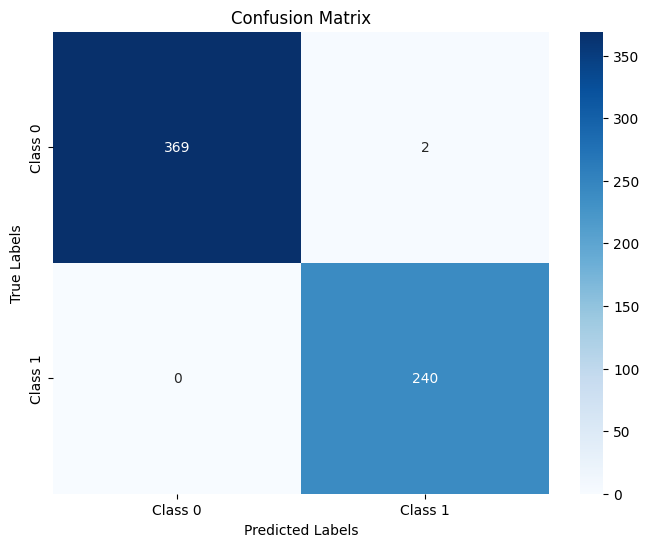

In [12]:
conf_metrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_metrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

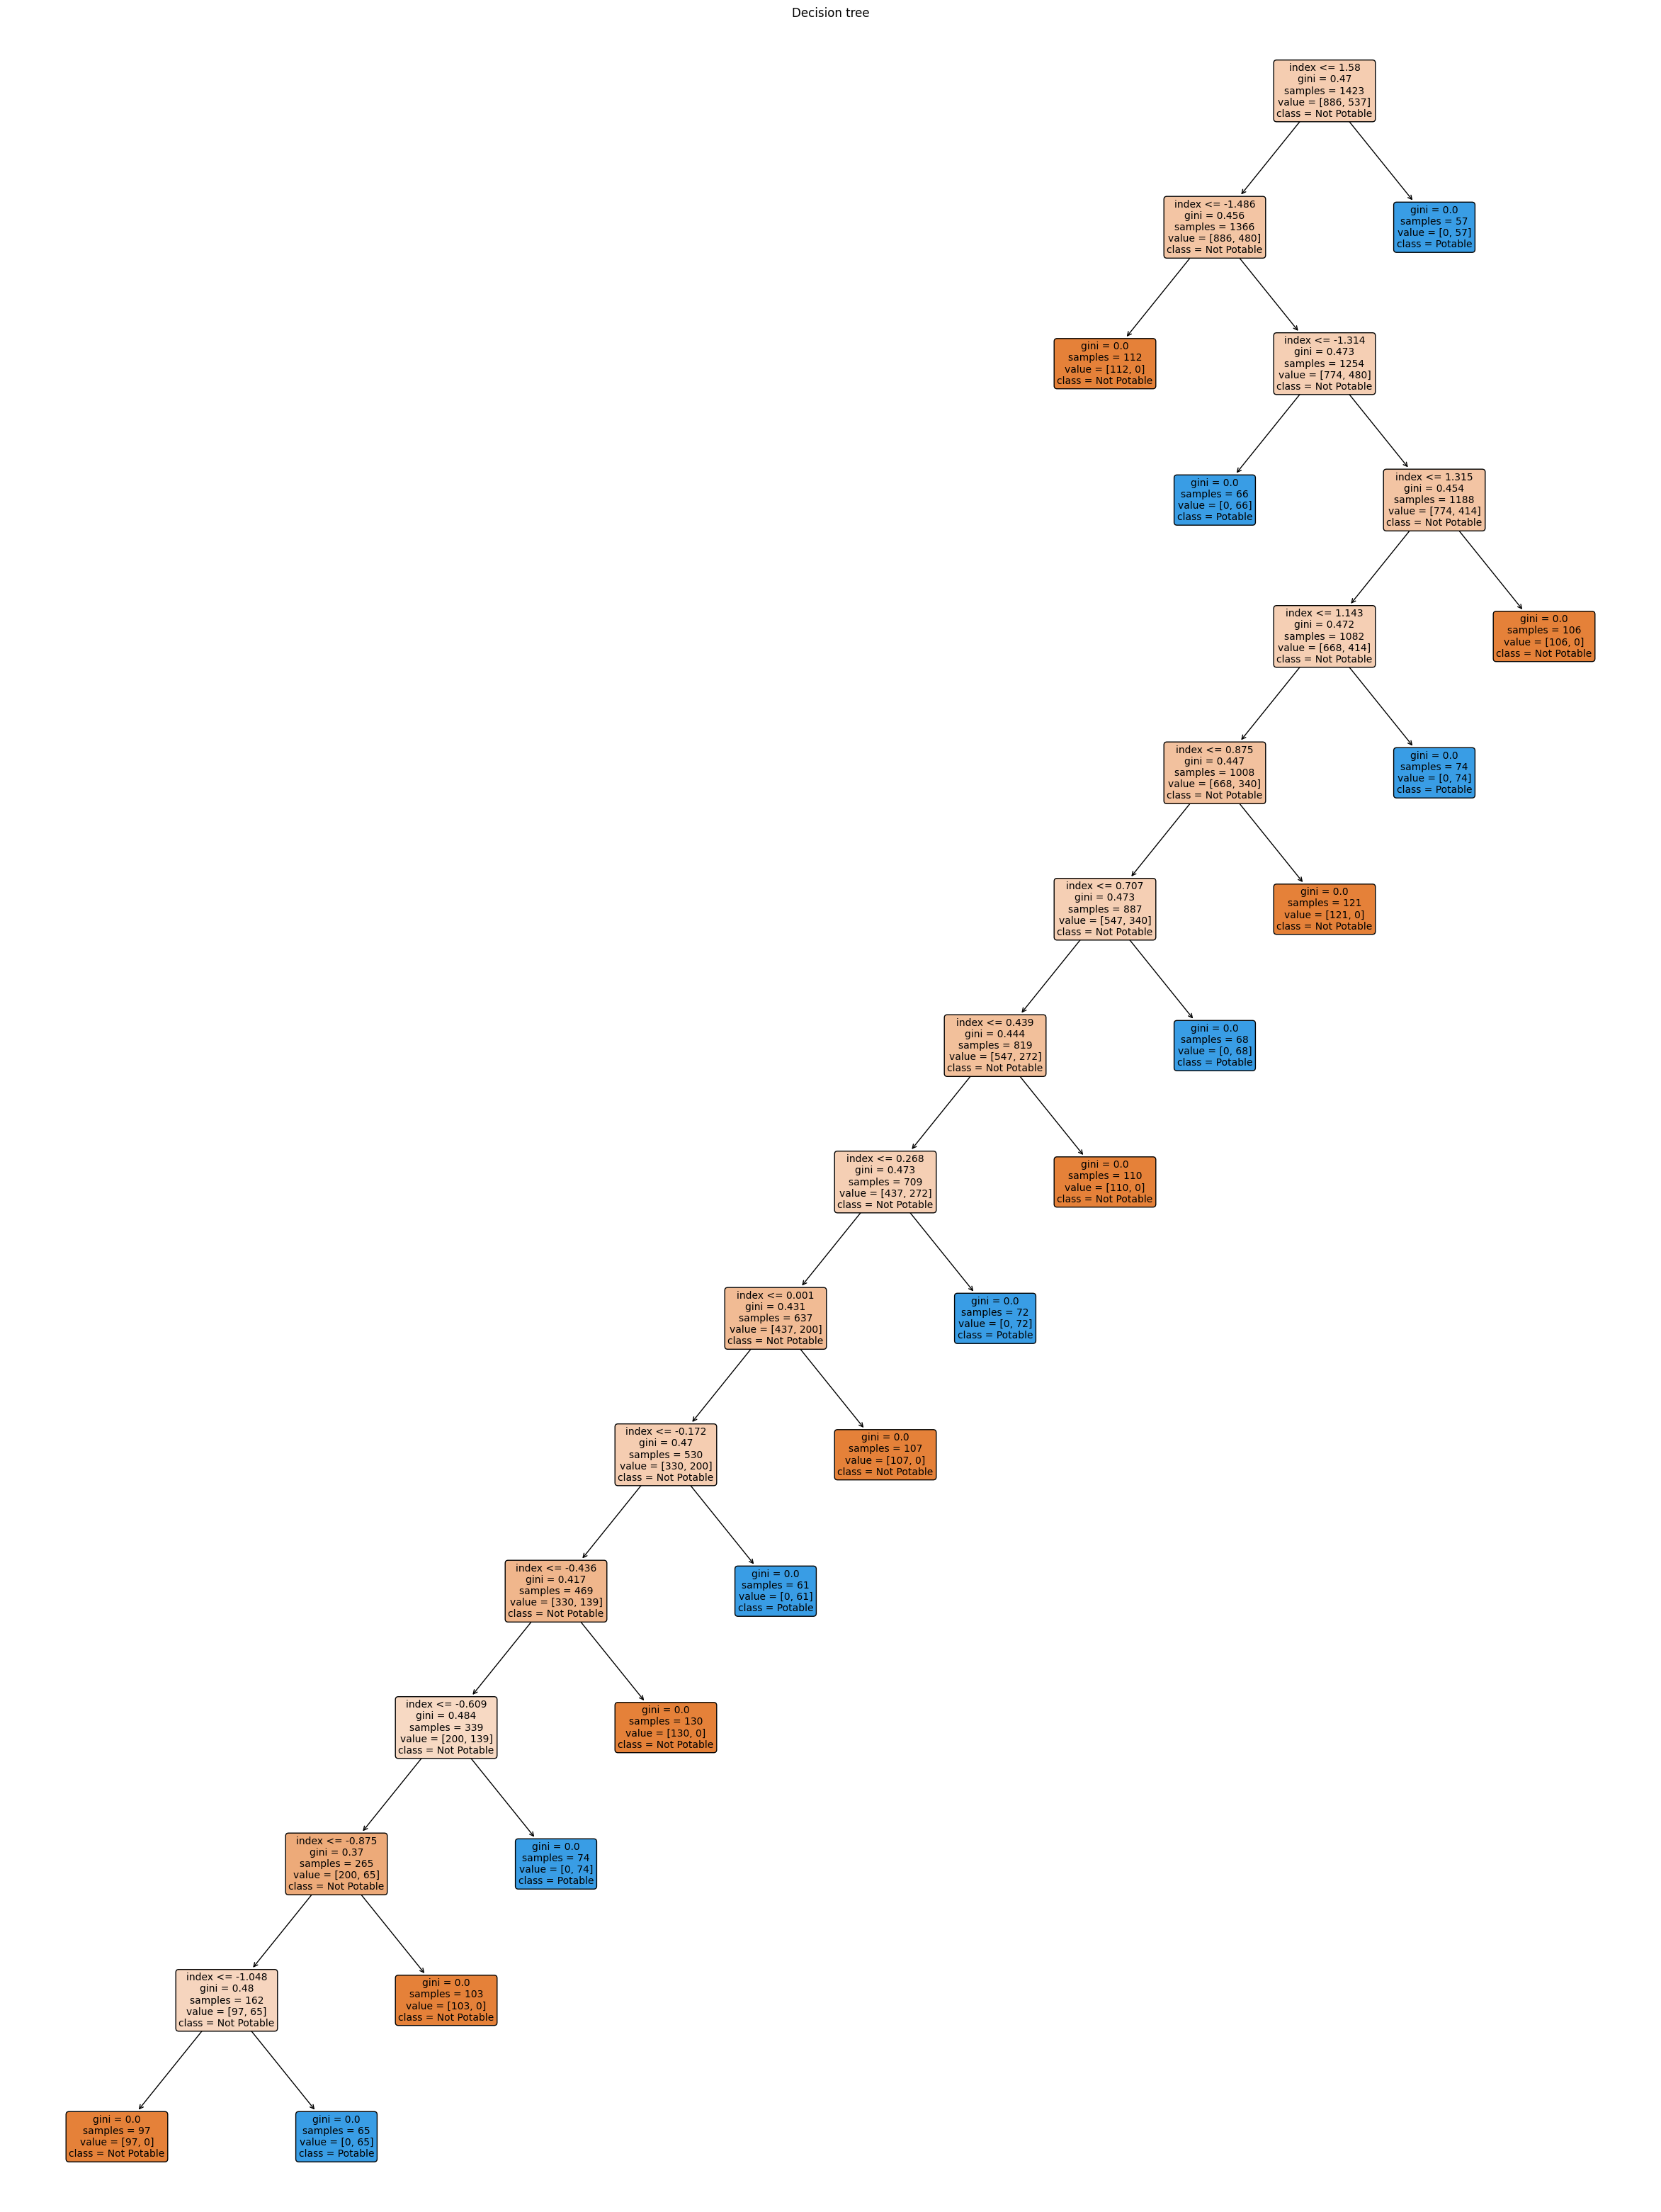

In [13]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 40)) 
plot_tree(
    dt,
    feature_names=data1.drop('Potability', axis=1).columns,
    class_names=['Not Potable', 'Potable'],filled=True,rounded=True,fontsize=10
)

plt.title("Decision tree")
plt.show()

In [15]:
def evaluate_model(params):
    scores = []
    for param in params:
        criterion_index = int(param[0])
        max_depth = int(param[1])
        min_samples_split = int(param[2])
        min_samples_leaf = int(param[3])
        max_leaf_nodes = int(param[4])
        criterion_options = ["gini", "entropy", "log_loss"]
        criterion = criterion_options[criterion_index % len(criterion_options)]
        model = DecisionTreeClassifier(
            criterion=criterion,
            max_depth=max_depth if max_depth > 0 else None,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            max_leaf_nodes=max_leaf_nodes if max_leaf_nodes > 0 else None,
            random_state=42
        )
        scores_cv = cross_val_score(model, X_train, y_train, cv=10, scoring='f1')
        scores.append(-np.mean(scores_cv))
    return np.array(scores)

bounds = ([0, 1, 2, 1, 2], [2, 128, 20, 20, 128])
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=5, dimensions=5, options=options, bounds=bounds)
best_cost, best_params = optimizer.optimize(evaluate_model, iters=5)

print("Best Hyperparameters: ", best_params)
print("Best F1 Score: ", -best_cost)

2025-01-24 22:31:55,105 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|5/5, best_cost=-0.986
2025-01-24 22:32:00,157 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.9859963652275414, best pos: [  0.78457029 100.94239906   6.2946903   16.01243686  33.2371151 ]


Best Hyperparameters:  [  0.78457029 100.94239906   6.2946903   16.01243686  33.2371151 ]
Best F1 Score:  0.9859963652275414


In [16]:
best_criterion_index = int(best_params[0])
best_max_depth = int(best_params[1])
best_min_samples_split = int(best_params[2])
best_min_samples_leaf = int(best_params[3])
best_max_leaf_nodes = int(best_params[4])

criterion_options = ["gini", "entropy", "log_loss"]
best_criterion = criterion_options[best_criterion_index % len(criterion_options)]

best_model = DecisionTreeClassifier(
    criterion=best_criterion,
    max_depth=best_max_depth if best_max_depth > 0 else None,
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf,
    max_leaf_nodes=best_max_leaf_nodes if best_max_leaf_nodes > 0 else None,
    random_state=42
)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

print("\nF1 Score:")
print(f1_score(y_test, y_pred, average='weighted'))

print("Model trained with best hyperparameters.")


Confusion Matrix:
[[369   2]
 [  0 240]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       371
           1       0.99      1.00      1.00       240

    accuracy                           1.00       611
   macro avg       1.00      1.00      1.00       611
weighted avg       1.00      1.00      1.00       611


Accuracy Score:
0.9967266775777414

F1 Score:
0.9967290452944201
Model trained with best hyperparameters.


**Learning Curves**

In [17]:
from sklearn.model_selection import learning_curve

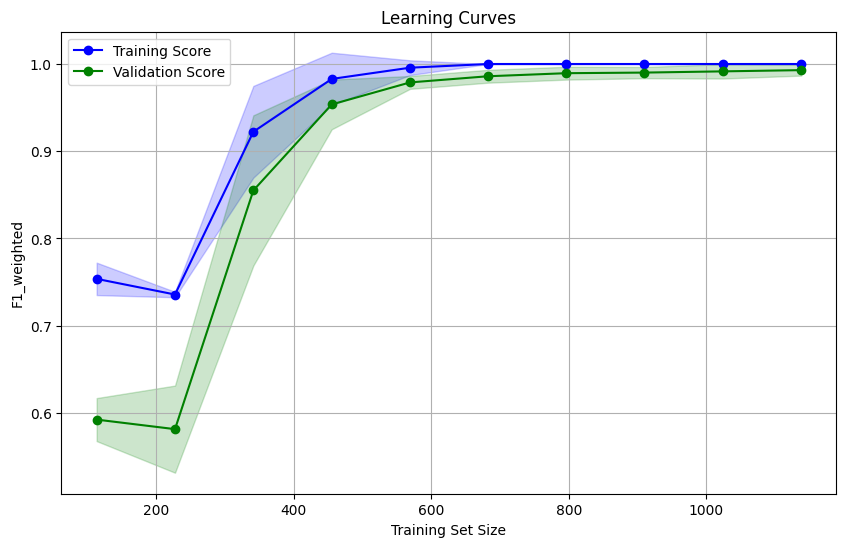

In [18]:
from sklearn.model_selection import learning_curve

def plot_learning_curves(model, X, y, cv=5, scoring='accuracy'):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=cv, scoring=scoring, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    # Plot learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2, color='blue')

    plt.plot(train_sizes, val_scores_mean, 'o-', color='green', label='Validation Score')
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.2, color='green')

    plt.title('Learning Curves')
    plt.xlabel('Training Set Size')
    plt.ylabel(scoring.capitalize())
    plt.legend(loc='best')
    plt.grid()
    plt.show()

plot_learning_curves(best_model, X_train, y_train, cv=5, scoring='f1_weighted')


**Separate Validation Set**

In [19]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='f1_weighted')
print("Cross-Validation F1 Scores:", cv_scores)
print("Mean F1 Score:", cv_scores.mean())


Cross-Validation F1 Scores: [0.61963336 0.37280255 0.69467842 0.30215351 0.44471084]
Mean F1 Score: 0.4867957358074289


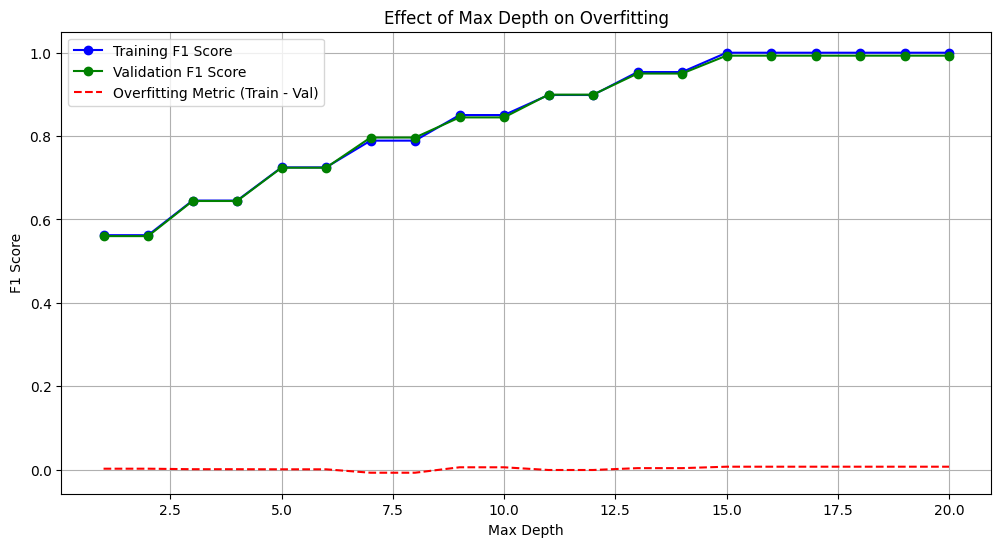

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

def evaluate_hyperparameter(X_train, y_train, param_range, param_name, min_samples_split, min_samples_leaf, max_leaf_nodes, criterion="gini"):
    training_scores = []
    validation_scores = []
    overfitting_metrics = []

    for param_value in param_range:
        model_params = {param_name: param_value,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf,
                        'max_leaf_nodes': max_leaf_nodes if max_leaf_nodes is not None and max_leaf_nodes > 0 else None,
                        'criterion': criterion,
                        'random_state': 42}
        
        model = DecisionTreeClassifier(**model_params)

        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        train_f1 = f1_score(y_train, y_train_pred, average='weighted')

        val_f1_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted')
        val_f1_mean = np.mean(val_f1_scores)
        overfitting_metric = train_f1 - val_f1_mean

        training_scores.append(train_f1)
        validation_scores.append(val_f1_mean)
        overfitting_metrics.append(overfitting_metric)

    return training_scores, validation_scores, overfitting_metrics

def plot_overfitting(param_range, training_scores, validation_scores, overfitting_metrics, param_name):
    plt.figure(figsize=(12, 6))
    plt.plot(param_range, training_scores, label="Training F1 Score", color="blue", marker="o")
    plt.plot(param_range, validation_scores, label="Validation F1 Score", color="green", marker="o")
    plt.plot(param_range, overfitting_metrics, label="Overfitting Metric (Train - Val)", color="red", linestyle="--")
    plt.xlabel(param_name)
    plt.ylabel("F1 Score")
    plt.title(f"Effect of {param_name} on Overfitting")
    plt.legend()
    plt.grid()
    plt.show()

max_depth_range = range(1, 21)
min_samples_split = 5
min_samples_leaf = 2
max_leaf_nodes = None

training_scores, validation_scores, overfitting_metrics = evaluate_hyperparameter(
    X_train, y_train, max_depth_range, "max_depth", min_samples_split, min_samples_leaf, max_leaf_nodes
)

plot_overfitting(max_depth_range, training_scores, validation_scores, overfitting_metrics, "Max Depth")


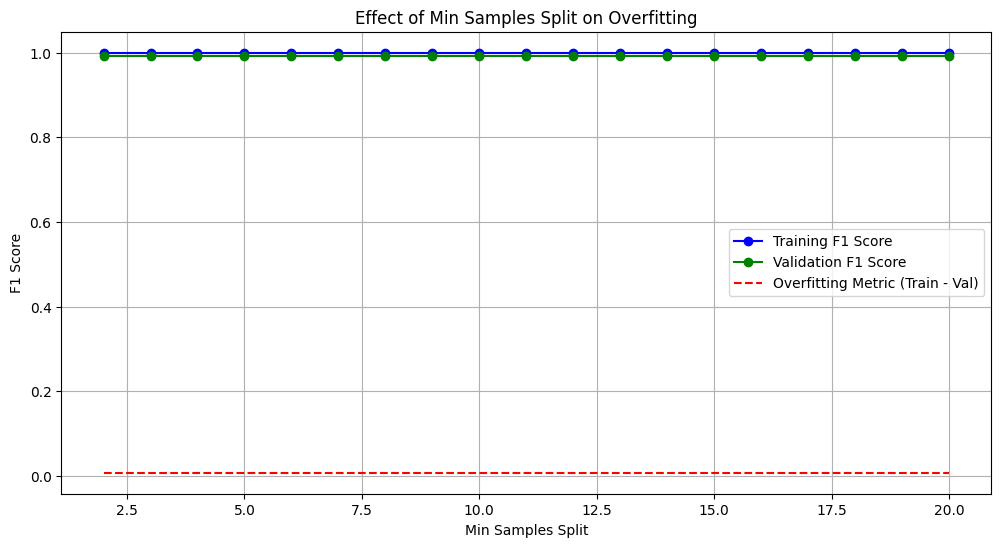

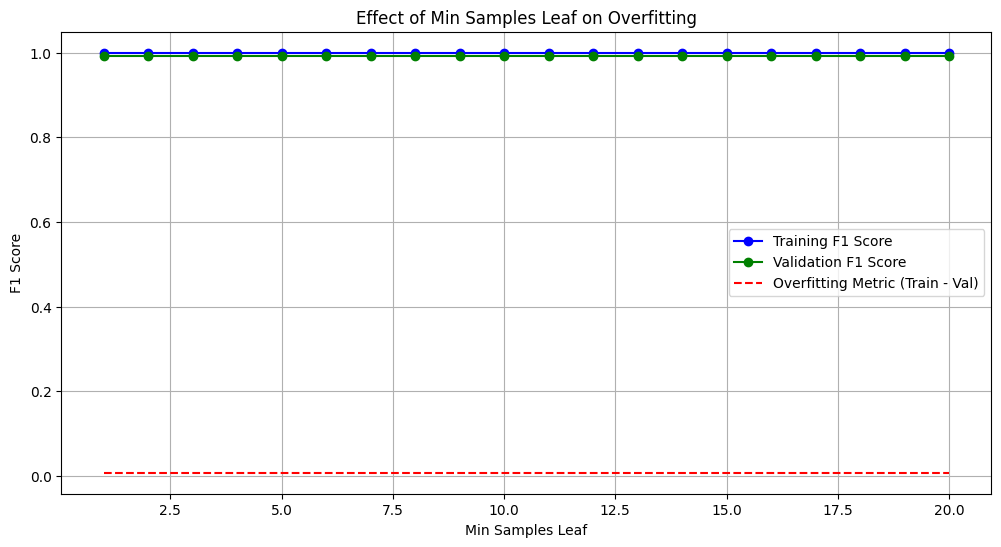

In [21]:
# Evaluate min_samples_split
min_samples_split_range = range(2, 21)
training_scores, validation_scores, overfitting_metrics = evaluate_hyperparameter(
    X_train, y_train, min_samples_split_range, "min_samples_split", 5, 2, None
)
plot_overfitting(min_samples_split_range, training_scores, validation_scores, overfitting_metrics, "Min Samples Split")

# Evaluate min_samples_leaf
min_samples_leaf_range = range(1, 21)
training_scores, validation_scores, overfitting_metrics = evaluate_hyperparameter(
    X_train, y_train, min_samples_leaf_range, "min_samples_leaf", 5, 2, None
)
plot_overfitting(min_samples_leaf_range, training_scores, validation_scores, overfitting_metrics, "Min Samples Leaf")



**Conclusion:The graph suggests that a Max Depth of around 10 provides a good balance between model complexity and generalization. Increasing the Max Depth beyond this point leads to overfitting, where the model performs well on the training data but poorly on unseen data.In essence, the optimal Max Depth for this model lies around 10.**


def evaluate_model(params):
    scores = []
    for param in params:
        criterion_index = int(param[0])
        max_depth = int(param[1])
        min_samples_split = int(param[2])
        min_samples_leaf = int(param[3])
        max_leaf_nodes = int(param[4])
        criterion_options = ["gini", "entropy", "log_loss"]
        criterion = criterion_options[criterion_index % len(criterion_options)]
        
        max_depth = min(max_depth, 10) if max_depth > 0 else None

        model = DecisionTreeClassifier(
            criterion=criterion,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            max_leaf_nodes=max_leaf_nodes if max_leaf_nodes > 0 else None,
            random_state=42
        )
        
        scores_cv = cross_val_score(model, X_train, y_train, cv=10, scoring='f1')
        scores.append(-np.mean(scores_cv))
    
    return np.array(scores)

bounds = ([0, 1, 2, 1, 2], [2, 128, 20, 20, 128])
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=5, dimensions=5, options=options, bounds=bounds)

best_cost, best_params = optimizer.optimize(evaluate_model, iters=5)

print("Best Hyperparameters: ", best_params)
print("Best F1 Score: ", -best_cost)

best_criterion_index = int(best_params[0])
best_max_depth = int(best_params[1])
best_min_samples_split = int(best_params[2])
best_min_samples_leaf = int(best_params[3])
best_max_leaf_nodes = int(best_params[4])

criterion_options = ["gini", "entropy", "log_loss"]
best_criterion = criterion_options[best_criterion_index % len(criterion_options)]

best_model = DecisionTreeClassifier(
    criterion=best_criterion,
    max_depth=min(best_max_depth, 10) if best_max_depth > 0 else None,  # max_depth still capped at 10
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf,
    max_leaf_nodes=best_max_leaf_nodes if best_max_leaf_nodes > 0 else None,
    random_state=42
)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

print("\nF1 Score:")
print(f1_score(y_test, y_pred, average='weighted'))

print("Model trained with best hyperparameters.")


**Saving the model**

In [22]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


In [23]:
import shutil

shutil.move('model.pkl', '/kaggle/working/model.pkl')


'/kaggle/working/model.pkl'

In [25]:
import sklearn
print(sklearn.__version__)


1.2.2


In [8]:
data1.columns

Index(['index', 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
       'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity',
       'Potability'],
      dtype='object')